In [150]:
import numpy as np
from matplotlib import pyplot as plt

A simple linear model example.
Assume a car is believed to travel 20 km per litre of petrol on average. Experimental data is collected for 100 trips.
A known quantity of petrol is poured in the car and 
the distance travelled by the car before it runs out of fuel is noted as y.
We expect a simple linear relation y = 20*x. 
Lets visualize the data to see if the relation is clear from experiments.

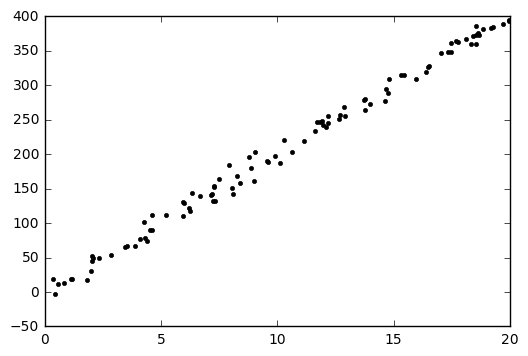

In [151]:
x = 20*np.random.rand(100,1)
y0 = 20*x + 10*np.random.randn(100,1)
plt.plot(x, y0, 'k.')
plt.show()

There is definitely some amount of deviation from the average. So given this experimental data can we say if the average mileage really is 20 km/ltr? We try fitting a simple linear model to this data y = c*x and find the best estimate of c.

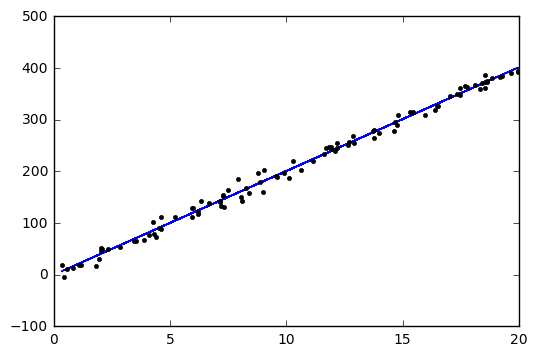

c = 20.081861321511536
R squared = 0.9933844590754799


In [155]:
theta = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y0))
y_b0 = x.dot(theta)
plt.plot(x,y_b0,'b-')
plt.plot(x,y0,'k.')
plt.show()
print ('c = {0}'.format(theta[0][0]))
print ('R squared = {0}'.format(1-((y_b0 - y0)**2).sum()/((y0-y0.mean())**2).sum()))

c is very close to 20, although not exactly 20 given the data. We can say that the model we chose y = c*x is very good and fits the data well with a confidence of over 99%.

In [158]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y0)
print (('Intercept = {0} and linear coeff = {1}').format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))
print ('R squared = {0}'.format(lin_reg.score(x, y0)))

Intercept = 0.056825221382950986 and linear coeff = 20.077679275733697
R squared = 0.9933845156922716


Linear regression using sklearn package tells us there is a slight bias in the data because we find a non 0 intercept, although very small and can be safely ignored, it points to a higher danger while using regression and any other model-fitting algorithm if we are not very careful. 
What does that mean? 
Lets see what our model estimate predicts for a trivial case when there is no petrol in the car:

In [161]:
print ('With {x} liters petrol the car will run for {y} kms'.format(x=0,y=lin_reg.predict(0)[0][0]))

With 0 liters petrol the car will run for 0.056825221382950986 kms


Clearly absurd. The model we chose to fit - a simple linear model, made sense to us given the kind of dynamics we are trying to model. During our experiments we never had a test case with 0 liters petrol. Would it have helped if we did have a data point explicitly for x=0? Perhaps. However, not always will we encounter data sets and phenomena whose dynamics will be well understood, and we will need a machine to anlayse and explain us more about them. 
Regression can be of immense value if used wisely to predict or forecast on unknown data points, with due importance given to the limitations of the model selected. If not, then results can be dangerously incorrect.

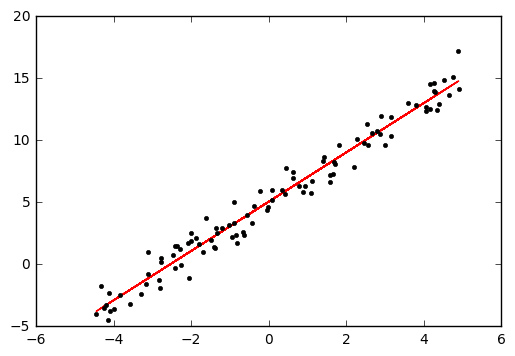

In [141]:
y_b2 = lin_reg.predict(x)
plt.plot(x, y_b2, 'r-')
plt.plot(x, y0,'k.')
plt.show()

In [137]:
# now assume there is no relation
y1 = np.random.randn(100)

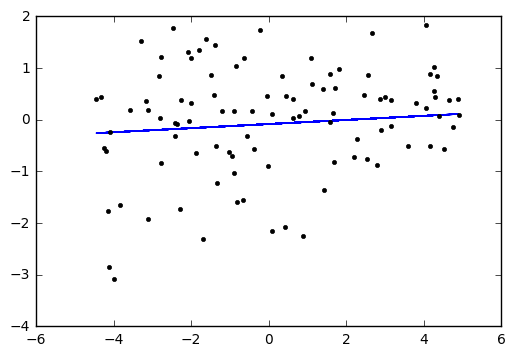

Intercept = -0.08251984981326617, linear coeff = 0.03959770694472187
R squared = 0.028971770910154127


In [139]:
theta_est2 = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T.dot(y2))
y_b1 = x_b.dot(theta_est2)
plt.plot(x,y_b1,'b-')
plt.plot(x,y1,'k.')
plt.show()
print ('Intercept = {0}, linear coeff = {1}'.format(theta_est2[0], theta_est2[1]))
print ('R squared = {0}'.format(1-((y_b1 - y1)**2).sum()/((y1-y1.mean())**2).sum()))